# import library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Read 

'C:\\Users\\dubev\\OneDrive\\Desktop\\Interships\\Oasis Infobyte\\Android App Market on Google Play'

In [5]:
df_apps = pd.read_csv('apps.csv');
df_apps

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [6]:
df_user_reviews = pd.read_csv('user_reviews.csv')
df_user_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [7]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [8]:
df_apps.nunique()

Unnamed: 0        9659
App               9659
Category            33
Rating              39
Reviews           5330
Size               191
Installs            21
Type                 2
Price               92
Content Rating       6
Genres             118
Last Updated      1377
Current Ver       2769
Android Ver         33
dtype: int64

# Cleaning and Preprocess 

-- [ Installs ] Column datatype is object and Remove '+' and ',' and convert into integer

In [9]:
df_apps['Installs'] = df_apps['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
df_apps['Installs'] = pd.to_numeric(df_apps['Installs'], errors='coerce').astype('Int64')

-- [ Price ] Column datatype is Object Remove '$' and convert to Float

In [10]:
df_apps['Price'] = df_apps['Price'].str.replace('$', '', regex=False)
df_apps['Price'] = pd.to_numeric(df_apps['Price'], errors='coerce')

-- [ Size ] Column Convert to MB 

In [11]:
def clean_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1024
        elif 'Varies with device' in size:
            return np.nan # Treat 'Varies with device' as missing size
    return size

df_apps['Size_MB'] = df_apps['Size'].apply(clean_size)

df_apps = df_apps.drop('Size', axis=1) # Drop original 'Size' column

In [12]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Installs        9659 non-null   Int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
 13  Size_MB         8432 non-null   float64
dtypes: Int64(1), float64(3), int64(2), object(8)
memory usage: 1.0+ MB


-- [ Rating ] Values with median imputation

In [13]:
df_apps['Rating'] = pd.to_numeric(df_apps['Rating'], errors='coerce')
median_rating = df_apps['Rating'].median()
df_apps['Rating'] = df_apps['Rating'].fillna(median_rating)

In [14]:
df_apps['Rating']

0       4.1
1       3.9
2       4.7
3       4.5
4       4.3
       ... 
9654    4.5
9655    5.0
9656    4.3
9657    4.5
9658    4.5
Name: Rating, Length: 9659, dtype: float64

# Correct Nulls values  

In [15]:
df_apps.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating               0
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Size_MB           1227
dtype: int64

-- Handle Missing value in  Size_MB column 

In [16]:
df_apps['Size_MB']

0       19.0
1       14.0
2        8.7
3       25.0
4        2.8
        ... 
9654    53.0
9655     3.6
9656     9.5
9657     NaN
9658    19.0
Name: Size_MB, Length: 9659, dtype: float64

In [17]:
df_apps['Size_MB'] = df_apps.groupby('Category')['Size_MB'].transform(lambda x: x.fillna(x.median()))
overall_median_size = df_apps['Size_MB'].median()
df_apps['Size_MB'] = df_apps['Size_MB'].fillna(overall_median_size)

In [18]:
df_apps['Size_MB'].isnull().sum()

np.int64(0)

-- Handle Null Value in Current Ver Column 

In [19]:
df_apps['Current Ver']

0                    1.0.0
1                    2.0.0
2                    1.2.4
3       Varies with device
4                      1.1
               ...        
9654                  1.48
9655                     1
9656                     1
9657    Varies with device
9658    Varies with device
Name: Current Ver, Length: 9659, dtype: object

-- Fill Nulls values [ Current Ver ] coulumn

In [20]:
df_apps['Current Ver'] = df_apps['Current Ver'].fillna('Unknown')

In [21]:
df_apps['Current Ver'].isnull().sum()

np.int64(0)

-- Fill Na Values Column [' Android Ver ']

In [22]:
df_apps['Android Ver'] = df_apps['Android Ver'].fillna('Unknown')

In [23]:
df_apps['Android Ver'].isnull().sum()

np.int64(0)

# Data Visualzation  &  EXploration

# Top 10 App Categories by Count

In [24]:
count_app_on_categories = df_apps.groupby('Category').App.count().nlargest(10)
count_app_on_categories

Category
FAMILY             1832
GAME                959
TOOLS               827
BUSINESS            420
MEDICAL             395
PERSONALIZATION     376
PRODUCTIVITY        374
LIFESTYLE           369
FINANCE             345
SPORTS              325
Name: App, dtype: int64

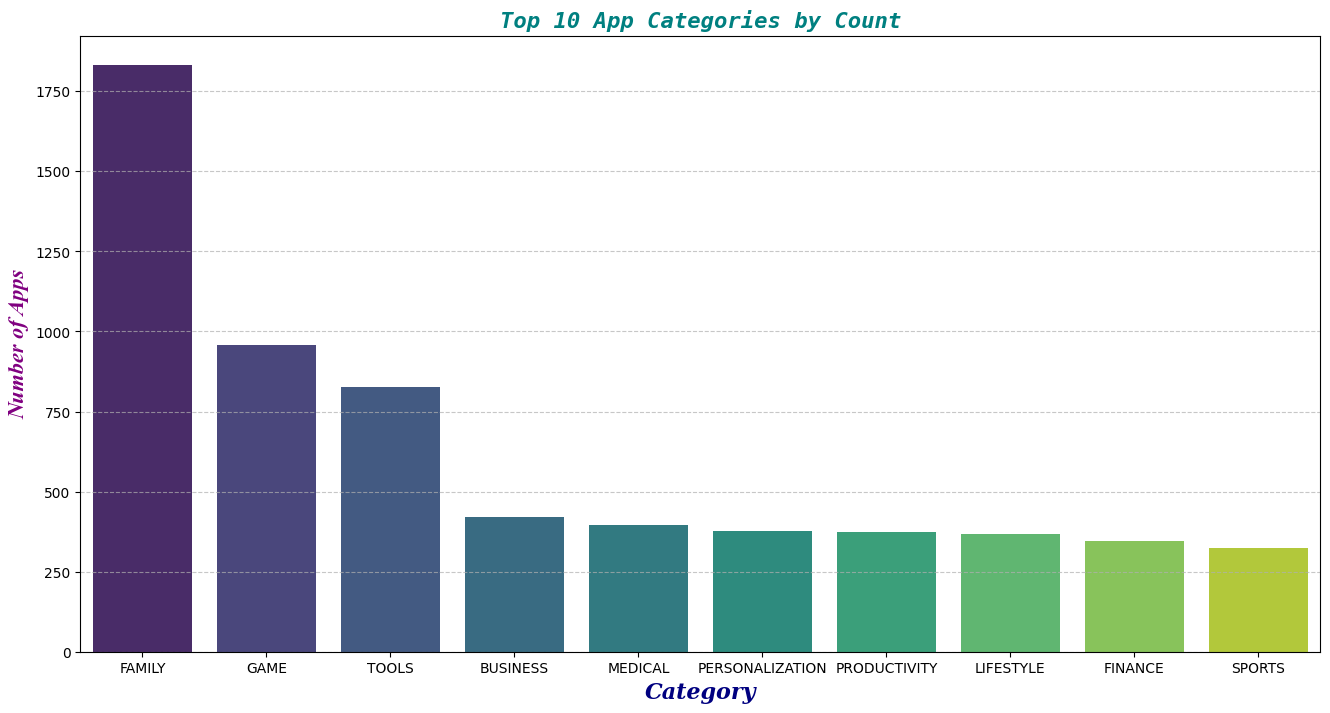

In [25]:
plt.figure(figsize=(16,8));
sns.barplot(x=count_app_on_categories.index, y=count_app_on_categories.values,hue=count_app_on_categories.index,legend=False, palette="viridis",);
plt.grid(axis='y', linestyle='--', alpha=0.7);
plt.title('Top 10 App Categories by Count', fontdict = {'family': 'monospace','color': 'teal','weight': 'bold','size': 16,'style':'italic'});
plt.xlabel('Category',fontdict = {'family': 'serif','color': 'navy','weight': 'bold','size': 16,'style':'italic'});
plt.ylabel('Number of Apps', fontdict = {'family': 'Times New Roman' ,'color': 'purple','weight': 'bold','size': 16,'style':'italic'});

# Averange Rating for Top 10 Categories

In [26]:
avg_rating_by_category = df_apps.groupby('Category')['Rating'].mean().sort_values(ascending=False).nlargest(10);
avg_rating_by_category 

Category
EVENTS                 4.395313
EDUCATION              4.363866
ART_AND_DESIGN         4.354687
BOOKS_AND_REFERENCE    4.334234
PERSONALIZATION        4.325532
PARENTING              4.300000
BEAUTY                 4.283019
SOCIAL                 4.255230
HEALTH_AND_FITNESS     4.251736
GAME                   4.249948
Name: Rating, dtype: float64

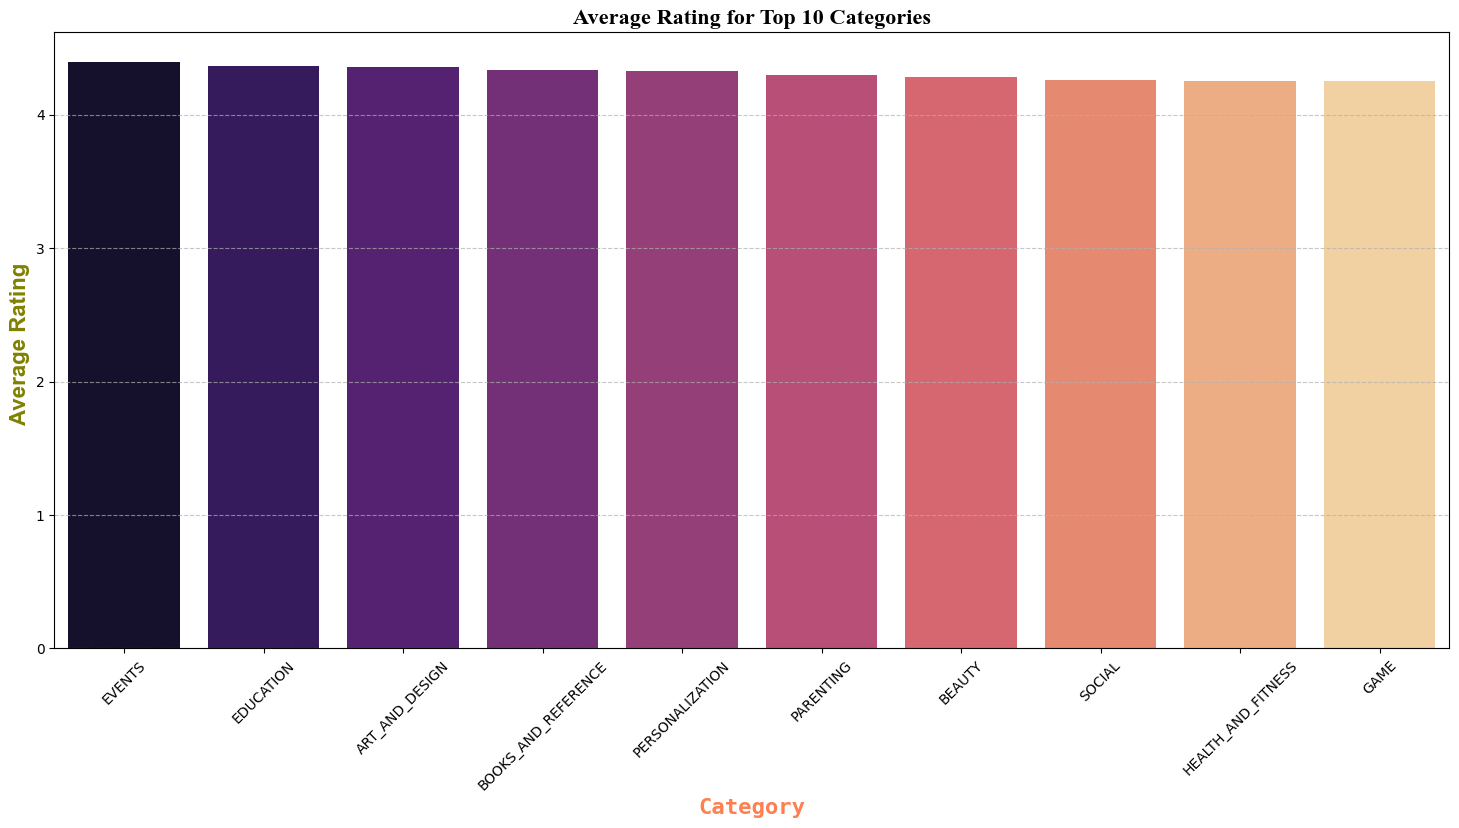

In [30]:
plt.figure(figsize=(18,8));
sns.barplot(x=avg_rating_by_category.index, y=avg_rating_by_category.values,hue=avg_rating_by_category.index,legend=False, palette="magma");
plt.tick_params(axis='x', rotation=45)
plt.title('Average Rating for Top 10 Categories', fontdict={'family': 'Times New Roman','color': 'black','weight': 'bold','size': 16,'style':'normal'});
plt.xlabel('Category', fontdict = {'family': 'monospace','color': 'coral','weight': 'bold','size': 16});
plt.ylabel('Average Rating ',fontdict = {'family': 'Arial','color': 'olive','weight': 'bold','size': 16})
plt.grid(axis='y', linestyle='--', alpha=0.7);

#  Top 5 Reviewed Apps Sentiment Distribution 

-- Clean Nulls Values 

In [33]:
clean_user_review = df_user_reviews.dropna(subset=['Sentiment', 'App']).copy()
clean_user_review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


# Overall User Sentiment Distribution

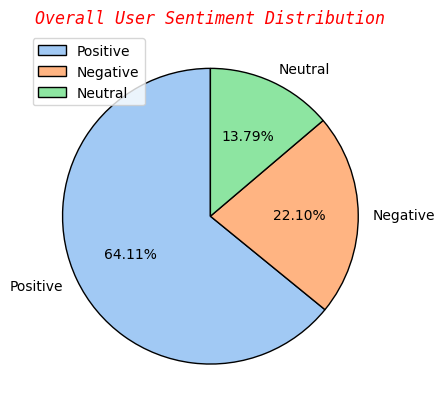

In [39]:
counts_sentiment = clean_user_review['Sentiment'].value_counts(normalize=True) * 100
counts_sentiment

plt.pie(counts_sentiment, labels = counts_sentiment.index, autopct='%1.2f%%', startangle=90, colors=sns.color_palette("pastel"),wedgeprops={'edgecolor':'black'});
plt.title('Overall User Sentiment Distribution', fontdict={'family':'monospace','color':'red','style':'oblique'})
plt.legend(counts_sentiment.index,loc='upper left');

# Top 5 Review Apps  

In [40]:
top_review_apps = clean_user_review['App'].value_counts().nlargest(5).sort_values(ascending=True)
top_review_apps

App
Duolingo: Learn Languages Free    240
Calorie Counter - MyFitnessPal    255
Angry Birds Classic               273
Helix Jump                        273
Bowmasters                        312
Name: count, dtype: int64

Text(0.5, 0, 'Total Number of Review ')

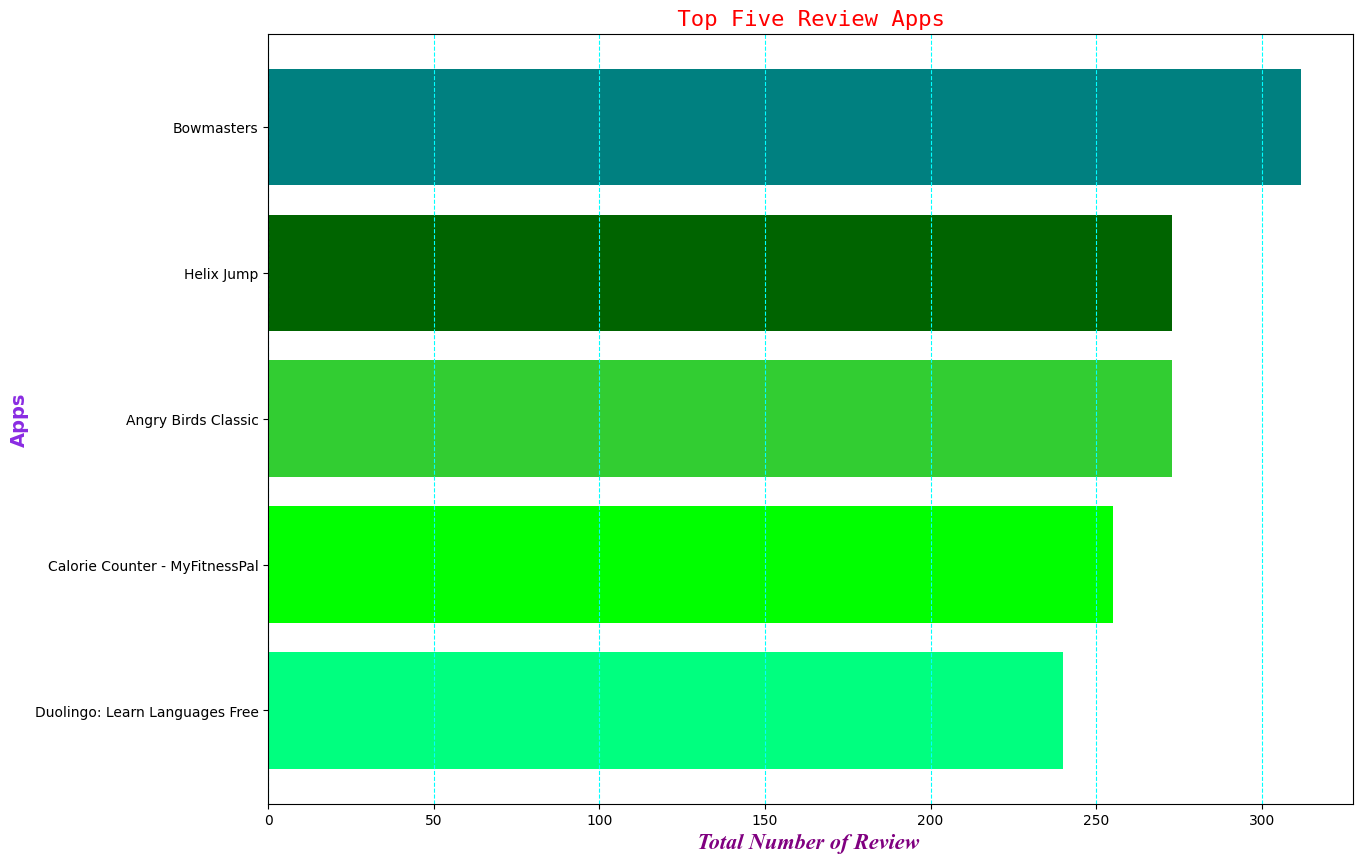

In [41]:
plt.figure(figsize=(14,10));
colors=['springgreen','lime','limegreen','darkgreen','teal'];
plt.barh(width=top_review_apps.values, y=top_review_apps.index, color=colors);
plt.grid(axis='x', linestyle='--',color='cyan');
plt.title(" Top Five Review Apps ",fontdict={'family':'monospace','color':'red','size':16})
plt.ylabel("Apps",fontdict={'family':'sans-serif','color':'blueviolet','weight':'bold','style':'normal','size':14})
plt.xlabel("Total Number of Review ",fontdict={'family':'Times New Roman','color':'purple','weight':'bold','style':'oblique','size':16})

# Monetization Strategy Comparison 

Problem : How do the average ratings, installations, and reviews compare between Free apps and Paid apps?

In [45]:
free_paid_comparison = df_apps.groupby('Type').agg(Avg_Rating=('Rating','mean'),Median_Installs=('Installs', 'median'),Median_Reviews=('Reviews', 'median'),Count=('Type', 'size')).reset_index()
free_paid_comparison

,Type,Avg_Rating,Median_Installs,Median_Reviews,Count
0,Free,4.186050,100000.0,1369.0,8903
1,Paid,4.267725,1000.0,88.0,756
